Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [20]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [21]:
data = pd.read_pickle("survey_transformed.pkl")

In [22]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_satisfaction_of_living,Barri_comparison,GREEN AREAS,PUBLIC LIGHTING,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_evolution,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,SATISFIED,GOOD,0,0,0
5,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT HAS IMPROVED,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,SATISFIED,GOOD,0,0,0
7,2007,CIUTAT VELLA,1.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT IS WORSE,I DON'T KNOW / NO ANSWER,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,< 50 M2,1001-2000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,NOT SATISFIED,GOOD,1,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,GOOD,...,101-150 M2,< 1000 EUROS,MIDDLE-LOW,0,IT HAS IMPROVED,SATISFIED,GOOD,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,SATISFIED,ONE OF THE BEST,BAD,GOOD,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,1,IT HAS IMPROVED,SATISFIED,GOOD,0,0,0


In [23]:
data.shape

(10915, 28)

In [24]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [25]:
x_var = data.columns.tolist()

In [26]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [27]:
x = data[x_var]

In [28]:
y = data['Would_not_stay_in_the_neighborhood']

In [29]:
x = pd.get_dummies(x)

In [30]:
x.columns.tolist()

['Gender',
 'Owns_a_car',
 'Living_alone',
 'BCN_over_barri_evolution',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'NOM_DISTRICTE_CIUTAT VELLA',
 'NOM_DISTRICTE_EIXAMPLE',
 'NOM_DISTRICTE_GRÀCIA',
 'NOM_DISTRICTE_HORTA - GUINARDÓ',
 'NOM_DISTRICTE_LES CORTS',
 'NOM_DISTRICTE_NOU BARRIS',
 'NOM_DISTRICTE_SANT ANDREU',
 'NOM_DISTRICTE_SANT MARTÍ',
 'NOM_DISTRICTE_SANTS - MONTJUÏC',
 'NOM_DISTRICTE_SARRIÀ - SANT GERVASI',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE CITY',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 "Barri_evolution_I DON'T KNOW / NO ANSWER",
 'Barri_evolution_IT HAS IMPROVED',
 'Barri_evolution_IT IS THE SAME',
 'Barri_evolution_IT IS WORSE',
 "Barri_satisfaction_of_living_I DON'T KNOW / NO ANSWER",
 'Barri_satisfaction_of_living_NOT SATISFIED',
 'Barri_satisfaction_of_living_SATISFIED',
 "Barri_comparison_I DON'T KNOW / NO ANSWER",
 'Barri_comparison_NEITHER THE BEST, NOR THE WORST',
 'Barri_

In [31]:
for i in x.columns.tolist():
    if i[-5:] == "_GOOD":
        del x[i]

In [32]:
for i in [#'Gender', 'Owns_a_car', 'Living_alone',
    #'BCN_over_barri_evolution', 'BCN_over_barri_satisfaction_of_living', 'BCN_over_barri_transport',
    
    #'NOM_DISTRICTE_CIUTAT VELLA', 'NOM_DISTRICTE_EIXAMPLE', 'NOM_DISTRICTE_GRÀCIA', 'NOM_DISTRICTE_HORTA - GUINARDÓ',
    #'NOM_DISTRICTE_LES CORTS', 'NOM_DISTRICTE_NOU BARRIS', 'NOM_DISTRICTE_SANT ANDREU', 'NOM_DISTRICTE_SANT MARTÍ',
    #'NOM_DISTRICTE_SANTS - MONTJUÏC',
    'NOM_DISTRICTE_SARRIÀ - SANT GERVASI',
    
    #'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE CITY',
    'Time_living_in_barri_LESS THAN 10 YEARS',
    #'Time_living_in_barri_MORE THAN 10 YEARS',
    
    #"Barri_evolution_I DON'T KNOW / NO ANSWER",
    'Barri_evolution_IT HAS IMPROVED',
    #'Barri_evolution_IT IS THE SAME',
    #'Barri_evolution_IT IS WORSE',
    
    #"Barri_satisfaction_of_living_I DON'T KNOW / NO ANSWER",
    #'Barri_satisfaction_of_living_NOT SATISFIED',
    'Barri_satisfaction_of_living_SATISFIED',
    
    #"Barri_comparison_I DON'T KNOW / NO ANSWER",
    #'Barri_comparison_NEITHER THE BEST, NOR THE WORST',
    'Barri_comparison_ONE OF THE BEST',
    #'Barri_comparison_ONE OF THE WORST',
    
    #'House_size_101-150 M2', 'House_size_51-100 M2',
    'House_size_< 50 M2',
    #'House_size_> 150 M2',
    
    #'Monthly_family_income_1001-2000 EUROS', 'Monthly_family_income_2001-3000 EUROS',
    'Monthly_family_income_< 1000 EUROS',
    #'Monthly_family_income_> 3000 EUROS',
    
    #'Social_class_HIGH','Social_class_MIDDLE-HIGH','Social_class_MIDDLE-LOW','Social_class_MIDDLE-MIDDLE',
    'Social_class_LOW']:
    del x[i]

In [33]:
x = sm.add_constant(x)

In [34]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.289033
         Iterations 7
                                                 Results: Logit
Model:                         Logit                                       Pseudo R-squared:          0.174      
Dependent Variable:            Would_not_stay_in_the_neighborhood          AIC:                       6419.5836  
Date:                          2021-04-25 17:20                            BIC:                       6820.9677  
No. Observations:              10915                                       Log-Likelihood:            -3154.8    
Df Model:                      54                                          LL-Null:                   -3818.3    
Df Residuals:                  10860                                       LLR p-value:               3.9932e-242
Converged:                     1.0000                                      Scale:                     1.0000     
No. Iterations:                7.000

In [35]:
result.pvalues.sort_values(ascending=False)

House_size_> 150 M2                                                 9.990261e-01
Barri_transport_I DON'T KNOW / NO ANSWER                            9.724513e-01
CIRCULATION_BAD                                                     9.600979e-01
ASPHALT AND STREET CONSERVATION_BAD                                 9.103429e-01
Social_class_MIDDLE-HIGH                                            8.566636e-01
House_size_51-100 M2                                                8.475164e-01
Barri_transport_BAD                                                 7.753772e-01
CIRCULATION_I DON'T KNOW / NO ANSWER                                7.695522e-01
Social_class_HIGH                                                   7.121916e-01
Social_class_MIDDLE-LOW                                             7.036176e-01
Barri_evolution_IT IS THE SAME                                      6.694018e-01
Barri_evolution_I DON'T KNOW / NO ANSWER                            6.536665e-01
MUNICIPAL MARKETS_BAD       

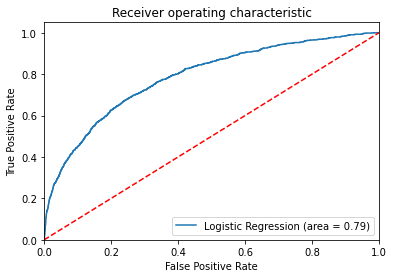

In [36]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [ ]:
for i in ['GARBAGE COLLECTION', 'BCN_over_barri_evolution', 'Barri_transport', 'Barri_evolution', 'Owns_a_car']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
for i in ['FACADES AND BUILDING CONSERVATION', 'MUNICIPAL POLICE', 'CIRCULATION', 'Gender']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
for i in ['BCN_over_barri_future', 'House_size', 'MUNICIPAL MARKETS', 'STREETS CLEANING']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
for i in ['PUBLIC LIGHTING', 'ASPHALT AND STREET CONSERVATION', 'Monthly_family_income', 'Social_class']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
for i in ['Living_alone']:
    x_var.remove(i)

In [ ]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [ ]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
print(result.get_margeff().summary())

In [ ]:
result.pred_table()

In [ ]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()